In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df.loc[df["koi_disposition"] != "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", "koi_prad", "koi_teq" ,"koi_insol", "koi_model_snr", "koi_tce_plnt_num", "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df.loc[df["koi_disposition"] != "CANDIDATE", "koi_disposition"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
979,0,1,1,1,41.077297,379.128480,0.030,5.52500,1216.8,3.25,523,17.74,28.8,1,5665,4.381,0.938,289.07703,51.761822,14.907
6201,0,1,0,0,13.639480,144.531439,1.033,3.12422,81103.0,44.00,680,50.51,664.1,1,5461,4.517,0.846,292.21732,49.707901,15.852
5648,0,1,0,0,14.854416,136.559783,0.570,5.13753,77410.0,29.77,798,95.83,2822.1,1,6214,4.444,1.022,282.42578,43.884331,14.558
229,0,0,0,0,10.681695,131.550820,0.646,3.60500,307.8,2.30,897,152.75,21.9,4,5553,4.221,1.250,292.58044,46.097389,15.065
1302,0,0,0,0,12.509458,136.992170,0.626,3.47900,155.3,1.54,875,138.54,16.0,2,5949,4.303,1.184,295.42200,38.735691,13.860


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

model4 =  LogisticRegression()
model4.fit(X_train_scaled, y_train)

LogisticRegression()

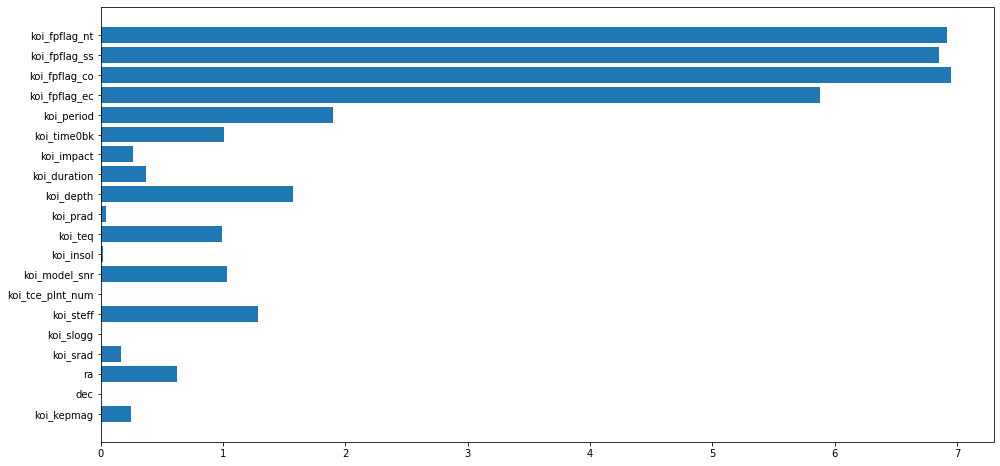

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.barh(X_train.columns, model4.coef_[0])
plt.xlim(0, max(model4.coef_[0])*1.05)
plt.gca().invert_yaxis()
plt.show()

In [14]:
# Set features again. This will also be used as your x values.
selected_features = df.loc[df["koi_disposition"] != "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", "koi_prad", "koi_teq" ,"koi_insol", "koi_model_snr", "koi_steff", "koi_srad", "ra", "koi_kepmag"]]
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model4.fit(X_train_scaled, y_train)

LogisticRegression()

# Train the Model



In [15]:
print(f"Training Data Score: {model4.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model4.score(X_test_scaled, y_test)}")

Training Data Score: 0.991955756661639
Testing Data Score: 0.9856711915535445


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [27]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['liblinear']
}
grid4 = GridSearchCV(model4, param_grid, cv=5, verbose=3)

In [28]:
# Train the model with GridSearch
grid4.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.339, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.339, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.339, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.338, total=   0.0s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.340, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.661, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.997, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.994, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.989, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.986, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.994, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.997, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.994, total=   0.0s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=3)

In [29]:
print(grid4.best_params_)
print(grid4.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.991957586675516


In [30]:
predictions = grid4.predict(X_test_scaled)

In [31]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.96      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.99      0.99      1326



In [32]:
candidates = df.loc[df["koi_disposition"] == "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", "koi_prad", "koi_teq" ,"koi_insol", "koi_model_snr", "koi_steff", "koi_srad", "ra", "koi_kepmag"]]
scaled_candidates = scaler.transform(candidates)
candidates["koi_disposition"] = grid4.predict(scaled_candidates)
candidates.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_srad,ra,koi_kepmag,koi_disposition
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,5712,1.082,292.16705,15.263,CONFIRMED
47,0,0,0,0,40.419504,173.564690,0.911,3.36200,6256.0,7.51,467,11.29,36.9,5446,0.781,294.31686,15.487,CONFIRMED
50,0,0,0,0,7.240661,137.755450,1.198,0.55800,556.4,19.45,734,68.63,13.7,5005,0.765,293.83331,15.334,CONFIRMED
51,0,0,0,0,3.435916,132.662400,0.624,3.13300,23.2,0.55,1272,617.61,8.7,5779,1.087,287.88733,12.791,CONFIRMED
59,0,0,0,0,1.626630,169.820171,1.260,2.11450,1620.6,32.43,1547,1355.88,103.6,5735,0.973,294.36819,15.279,CONFIRMED


# Save the Model

In [33]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'joonil_kim_4.sav'
joblib.dump(grid4, filename)

['joonil_kim_4.sav']